# Trabajo Practico N1 - Regresión Lineal

**Alumna**: Lucia Berard

**Fecha**: 22/03/2024


[Link a Google Colab](https://colab.research.google.com/drive/1TY3yrkQ18VVu1maiOd5a3uKKvzR-6j5C?usp=sharing)


 ## Consigna

En el mercado de smartphones, los dispositivos con mayor capacidad de almacenamiento suelen tener baterías más duraderas. Modelar estos datos podría ayudar a estimar la duración de la batería en función de su capacidad de almacenamiento, algo útil para los consumidores a la hora de elegir un nuevo dispositivo. Sea \(X\) la capacidad de almacenamiento de los smartphones (en TB) e \(Y\) la duración de su batería (en días), con densidad de probabilidad conjunta de la forma:

$
p_{XY}(x,y) = \frac{3}{4} \cdot \mathbf{1} \{0 < y < 1 + x^2, 0 < x < 1\}
$



---

## (a) Soluciones óptimas:


📌 **Nota:** Las únicas integrales que debe resolver son con respecto a la marginal $p_X(x)$. El resto de los cálculos debe hacerse utilizando propiedades.




### **1. Calcular la esperanza condicional.**

La experenza condicional se define como:

$
E[Y|X] = \int y \cdot P_{y|x} \, dy
$

Realizar esta integral se puede evitar calculando $P_{y|x}$ y luego obteniendo la esperanza por tabla suponiendo que la funcion de probabilidad va a tener una distribucion conocida.

Para obtener $P_{y|x}$ se tiene que calcular la probabilidad de X, $P_x$

$
P_X = \int P{yx} \cdot dy = \int \frac{3}{4} \cdot \mathbf{1} \{ 0 < x < 1\} \mathbf{1} \{0 < y < 1 + x^2\}dy
$

$
P_X = \int_{0}^{1 + x^2} \frac{3}{4} \cdot \mathbf{1} \{ 0 < x < 1\} dy = \frac{3}{4}(1 + x^2)  \cdot \mathbf{1} \{ 0 < x < 1\}
$


Luego a partir de

$
P_{Y|X} = \frac{P_{XY}}{P_{X}}
$

calculo $P_{Y|X}$ :

$
P_{Y|X} = \frac{1}{1+x^2} \cdot \mathbf{1} \{ 0 < y < 1+x^2\}
$

Con esta informacion se puede observar que $P_{Y|X}$ tiene una distribucion uniforme entre los valores $a=0$ y $b=1+x^2$ por lo que la experanza condicional es:

$
\boxed{E[Y|X] = \frac{a+b}{2} = \frac{1+x^2}{2}}
$



### **2. Calcular el error bayesiano.**

El error bayesiano es la esperanza de la varianza condicional, la cual la puedo obtener por tabla:

$
E[Var(Y|X)] = E[\frac{(b - a)^2}{12}] = E[\frac{(1 + x^2)^2}{12}] = E[\frac{(1 + 2x^2 + x^4)^2}{12}]
$

Por propiedades de la esperanza, se puede calcular de la siguiente forma:

$
E[Var(Y|X)] = \frac{1}{12} \cdot ( E[1] + 2 \cdot E[X^2] + E[X^4] )
$

Para calcular $E[2X^2]$ y $E[2X^4]$ se puede usar la ecuacion de momentos de X:

$
E[X^k] = \int X^k p_x dx
$

por lo que:

$
E[X^2] = \int_{0}^{1} X^2 p_x dx = \frac{3}{4} \int_{0}^{1} (x^2 + x^3) dx = 0.4
$

$
E[X^4] = \frac{3}{4} \int_{0}^{1} (x^4 + x^6) dx = 0,2571
$

El error bayesiano entonces es:

$
\boxed{E[Var(Y|X)] = \frac{1}{12} \cdot (1 + 2 \cdot 0.4375 + 0,2571428571 ) = 0,1714}
$

### **3. Calcular la recta de regresión.**

La recta de regresion se calcula con la siguiente ecuacion:

$
ŷ = \frac{Cov(X,Y)}{Var(X)} \cdot (X - E[X]) + E[Y]
$


Paso a paso:

- **Esperanza de Y**:

$
E[Y] = E[E[Y|X]] = E[\frac{1+ x^2}{2}] = \frac{1}{2} (E[1] + E[x^2]) = 0,7
$

- **Esperanza de X**:

$
E[X] = \int_{0}^{1} X \cdot p_x dx = \frac{3}{4} \int_{0}^{1} (x + x^3) dx = 0.5625
$

- **Esperanza de \( X^3 \)**:

$
E[X^3] = \int_{0}^{1} X^3 p_x dx = \frac{3}{4} \int_{0}^{1} (x^3 + x^5) dx = 0.3125
$

- **Esperanza de \( XY \)**:

$
E[XY] = E[XE[Y|X]] = E[x\frac{1+ x^2}{2}] = E[\frac{x+ x^3}{2}] = \frac{1}{2} (E[x] + E[x^3]) = 0.4375
$

- **Covarianza entre X e Y**:

$
Cov(X,Y) = E[XY] - E[Y]E[X] = 0.04375
$

- **Varianza de X**:

$
Var(X)=E[X^2]−(E[X])^2 = 0.0836
$

#### Resultado final:

$
ŷ = \frac{Cov(X,Y)}{Var(X)} \cdot (X - E[X]) + E[Y]
$

$
\boxed{
ŷ = \frac{0.04375}{0.0836}(X - 0.5625) + 0.7 \quad \Rightarrow \quad ŷ = 0.5233 \cdot X + 0.4056
}
$


---
## (b) Simulación:

- Utilizando `random.uniform` (numpy), generar un dataset de 500 pares de muestras.

📌 Nota:  Truncada de uniforme es uniforme y simular truncadas es intuitivo.



Matplotlib is building the font cache; this may take a moment.


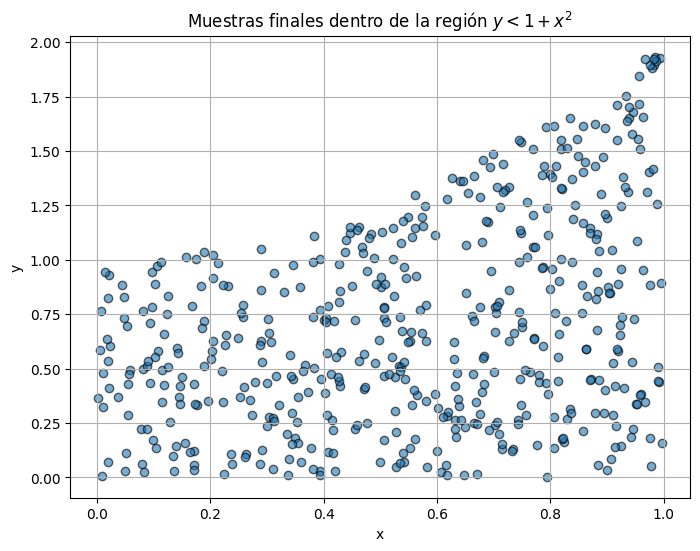

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir el número total de muestras para generar y truncar
num_samples = 5000  # Se genera un número mayor de muestras para luego filtrar
final_samples = 500  # Número de muestras deseadas

# Generar X uniformemente en (0,1)
x_samples = np.random.uniform(0, 1, num_samples)

# Generar Y uniformemente en (0,2)
y_samples = np.random.uniform(0, 2, num_samples)

# Aplicar el filtro y < 1 + x^2
valid_indices = y_samples < (1 + x_samples**2)
filtered_x = x_samples[valid_indices]
filtered_y = y_samples[valid_indices]

# Seleccionar aleatoriamente 500 muestras
selected_indices = np.random.choice(len(filtered_x), final_samples, replace=False)
x_final = filtered_x[selected_indices]
y_final = filtered_y[selected_indices]

# Realizar un grafico para mostrar los puntos finales
plt.figure(figsize=(8, 6))
plt.scatter(x_final, y_final, alpha=0.6, edgecolor='k')
plt.title('Muestras finales dentro de la región $y < 1 + x^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


---
## (c) Regresión Lineal:

1. Implementar una regresión lineal (matricial) a partir de los datos generados previamente.  
   El código debe estar estructurado de la siguiente manera:

```python
class regresion_lineal:
    # Opcional, para inicializar atributos o declarar hiperparámetros
    def __init__(self, ...):
        ...

    # Etapa de entrenamiento
    def fit(self, X, y):
        ...

    # Etapa de testeo
    def predict(self, X):
        ...
```

A su vez, debe poder extraer los atributos reglin.w_ y reglin.b_ una vez que el regresor fue entrenado.



In [2]:
import numpy as np

class regresion_lineal:
    def __init__(self):
        self.w_ = None
        self.b_ = None

    def fit(self, X, y):
        # Asegurar que X sea una matriz columna
        X = X.reshape(-1, 1)
        n = X.shape[0]

        # Agregar columna de 1s para el término independiente (bias)
        X_bias = np.hstack([X, np.ones((n, 1))])

        # Resolver por ecuación normal: theta = (X^T X)^(-1) X^T y
        theta = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

        self.w_ = theta[0]
        self.b_ = theta[1]

    def predict(self, X):
        X = np.array(X).reshape(-1)
        return self.w_ * X + self.b_


2. Entrenar la regresión lineal con el dataset generado anteriormente.


In [3]:
from IPython.display import display, Markdown

# Instanciar y entrenar el modelo
reglin = regresion_lineal()
reglin.fit(x_final, y_final)

# Mostrar los resultados en formato Markdown
display(Markdown(f"""
### 📈 Parámetros aprendidos por el modelo de regresión lineal

- **Pendiente (w_):** {reglin.w_:.4f}
- **Intercepto (b_):** {reglin.b_:.4f}

La ecuación de la recta resultante es:

$
\hat{{y}} = {reglin.w_:.4f} \cdot x + {reglin.b_:.4f}
$
"""))


### 📈 Parámetros aprendidos por el modelo de regresión lineal

- **Pendiente (w_):** 0.6153
- **Intercepto (b_):** 0.3565

La ecuación de la recta resultante es:

$
\hat{y} = 0.6153 \cdot x + 0.3565
$


3. Utilizar el regresor para predecir la duración de una batería de 256GB.


Duración de batería estimada para 256GB: 0.55 días


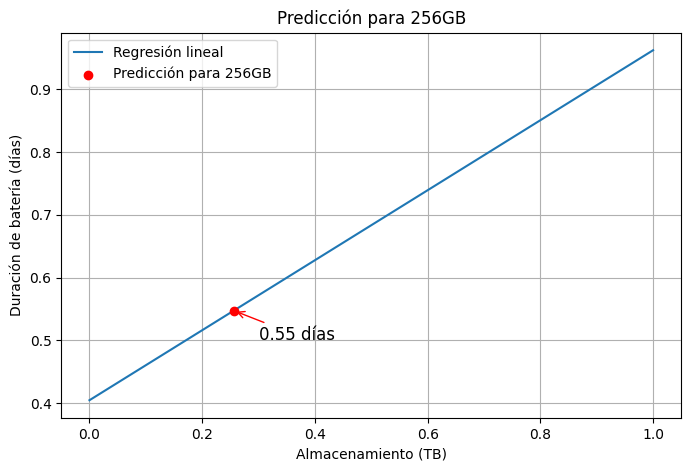

In [ ]:
# Predecir para 256 GB = 0.256 TB
storage_tb = 0.256
predicted_battery = reglin.predict([storage_tb])[0]
print(f"Duración de batería estimada para 256GB: {predicted_battery:.2f} días")

# Grafico para visualizar resultado
plt.figure(figsize=(8, 5))
plt.plot(x_vals, reglin.predict(x_vals), label='Regresión lineal')
plt.scatter([storage_tb], [predicted_battery], color='red', zorder=5, label='Predicción para 256GB')
plt.annotate(f"{predicted_battery:.2f} días",
             xy=(storage_tb, predicted_battery),
             xytext=(0.3, 0.5),
             arrowprops=dict(arrowstyle="->", color='red'),
             fontsize=12)
plt.xlabel("Almacenamiento (TB)")
plt.ylabel("Duración de batería (días)")
plt.title("Predicción para 256GB")
plt.legend()
plt.grid(True)
plt.show()


---
## (d) Comparación:
Graficar en una misma figura (pyplot):
- El soporte
- La esperanza condicional
- La recta de regresión (teórica)
- La regresión lineal hallada



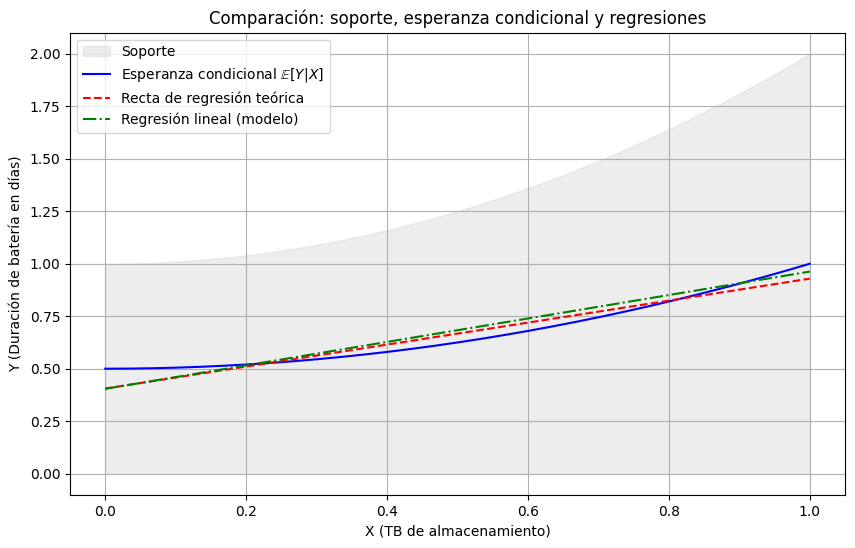

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crear grilla de valores de x
x_vals = np.linspace(0, 1, 300)

# Soporte: límite superior de y para cada x
y_max = 1 + x_vals**2

# Esperanza condicional E[Y|X]
ey_given_x = (1 + x_vals**2) / 2

# Recta de regresión teórica: y = 0.5233 * x + 0.4056
y_regresion_teorica = 0.5233 * x_vals + 0.4056

# Recta de regresión aprendida (con tu modelo entrenado en (c))
y_modelo_entrenado = reglin.predict(x_vals)

# Crear figura
plt.figure(figsize=(10,6))

# 1. Soporte (en sombreado)
plt.fill_between(x_vals, 0, y_max, color='lightgray', alpha=0.4, label='Soporte')

# 2. Esperanza condicional
plt.plot(x_vals, ey_given_x, label='Esperanza condicional $\mathbb{E}[Y|X]$', color='blue')

# 3. Recta de regresión teórica
plt.plot(x_vals, y_regresion_teorica, label='Recta de regresión teórica', color='red', linestyle='--')

# 4. Recta del modelo entrenado
plt.plot(x_vals, y_modelo_entrenado, label='Regresión lineal (modelo)', color='green', linestyle='-.')

# Etiquetas y leyenda
plt.xlabel('X (TB de almacenamiento)')
plt.ylabel('Y (Duración de batería en días)')
plt.title('Comparación: soporte, esperanza condicional y regresiones')
plt.legend()
plt.grid(True)
plt.show()


---
##(d) Repetir el inciso (c) utilizando gradiente descendente

1. Implementar gradiente descendente

In [ ]:
import numpy as np

class regresion_lineal_GD:
    def __init__(self, lr=0.1, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.w_ = 0
        self.b_ = 0

    def fit(self, X, y):
        X = X.reshape(-1)
        y = y.reshape(-1)
        n = len(X)

        # Inicializar parámetros
        w = 0.0
        b = 0.0

        # Gradiente descendente
        for _ in range(self.epochs):
            y_pred = w * X + b
            error = y_pred - y

            dw = (2/n) * np.dot(error, X)
            db = (2/n) * np.sum(error)

            w -= self.lr * dw
            b -= self.lr * db

        self.w_ = w
        self.b_ = b

    def predict(self, X):
        X = np.array(X).reshape(-1)
        return self.w_ * X + self.b_


2. Entrenamiento con los datos simulados

In [ ]:
# Instanciar y entrenar el modelo con gradiente descendente
reglin_gd = regresion_lineal_GD(lr=0.1, epochs=1000)
reglin_gd.fit(x_final, y_final)

# Mostrar los parámetros aprendidos
from IPython.display import display, Markdown

display(Markdown(f"""
### 📉 Parámetros aprendidos por gradiente descendente

- **Pendiente (w):** {reglin_gd.w_:.4f}
- **Intercepto (b):** {reglin_gd.b_:.4f}

La ecuación de la recta resultante es:

$
\hat{{y}} = {reglin_gd.w_:.4f} \cdot x + {reglin_gd.b_:.4f}
$
"""))



### 📉 Parámetros aprendidos por gradiente descendente

- **Pendiente (w):** 0.5581  
- **Intercepto (b):** 0.4044

La ecuación de la recta resultante es:

$
\hat{y} = 0.5581 \cdot x + 0.4044
$


3. Predicción para 256GB

In [ ]:
storage_tb = 0.256
predicted_battery_gd = reglin_gd.predict([storage_tb])[0]

display(Markdown(f"""
### 🔋 Predicción con gradiente descendente

Para un smartphone con **256GB** (0.256 TB), la duración estimada de batería es:

$
{predicted_battery_gd:.2f} \t{{ días}}
$
"""))



### 🔋 Predicción con gradiente descendente

Para un smartphone con **256GB** (0.256 TB), la duración estimada de batería es:

$
0.55 	{ días}
$
